In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import ModelFunctions as F

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import dataframe_image as dfi
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

### Figure 4g

This figure compares the contributions from cell stacks and balance of plant to the system cost (on the basis of tonne per year of iron capacity)

[976.9279704930686, 776.0642756253349]


Text(0, 0.5, 'USD/tpy$_{Fe}$')

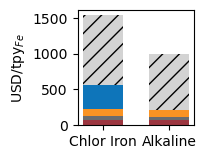

In [5]:
categories = ['Chlor Iron', 'Alkaline']

FE = F.Fe_kA_to_tpy(0.90)

Base_Current = 2 # kA/m^2

# Calculate balance of plant costs for both cells
CI_costs = F.BOP_cost(reportout=True)
ALK_costs = F.alkaline_BOP_cost(reportout=True)

bar1 = [CI_costs['Fe']/FE, ALK_costs['Fe']/FE]
bar2 = [CI_costs['NaOH']/FE, ALK_costs['NaOH']/FE]
bar3 = [CI_costs['Electrical']/FE, ALK_costs['Electrical']/FE]
bar4 = [CI_costs['H2']/FE, ALK_costs['H2']/FE]
bar5 = [CI_costs['Cl2']/FE, 0]

# Consolidate values between lists
base3 = [x + y for x, y in zip(bar1, bar2)]
base4 = [x + y for x, y in zip(bar3, base3)]
base5 = [x + y for x, y in zip(bar4, base4)]

# Calculate stack costs for both cells
bar6 = [F.stack_cost(Base_Current)/FE, F.stack_cost(Base_Current,alkaline=True)/FE]
print(bar6)
base6 = [x + y for x, y in zip(bar5, base5)]

# Create the figure and axes
fig, ax = plt.subplots(1,1,figsize=(1.5,1.5))

plt.rcParams.update({'font.size': 9}) 

# Width of each bar
bar_width = 0.6

# Positions for the bars
x_pos = np.arange(len(categories))

# Plot BOP costs
ax.bar(x_pos, bar1, bar_width, label='Fe BoP', color='#9C3640')
ax.bar(x_pos, bar2, bar_width, bottom=bar1, label='NaOH BoP', color='#6B6C6E')
ax.bar(x_pos, bar3, bar_width, bottom=base3, label='Electrical BoP', color='#FA9323')
ax.bar(x_pos, bar4, bar_width, bottom=base4, label='H$_2$ BoP', color = 'black')
ax.bar(x_pos, bar5, bar_width, bottom=base5, label='Cl$_2$ BoP', color='#0E75BA')

ax.bar(x_pos, bar6, bar_width, bottom=base6, label='Stack', color = 'lightgray', hatch='//')

# Chart Labels
ax.set_xticks(x_pos)
ax.set_xticklabels(categories)
ax.set_ylabel('USD/tpy$_{Fe}$')


### Figure 4e

This figure compares how the cost of a chlor iron system is affected by the operating current.


Text(0, 0.5, 'USD/tpy$_{Fe}$')

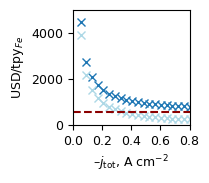

In [6]:
js = np.linspace(0.5,8,20)
costs = F.stack_cost(js) + F.BOP_cost()
tpy_costs = costs / F.Fe_kA_to_tpy(0.9)

# Base cost irrespective of current density
bop_floor = (F.BOP_cost() / F.Fe_kA_to_tpy(0.9))

plt.figure(figsize=(1.5,1.5))

# Plot data
plt.plot(js/10, tpy_costs, 'x')
plt.plot(js/10, (F.stack_cost(js)/F.Fe_kA_to_tpy(0.9)), 'x', color='lightblue')
plt.plot([0,js[-1]/10], [bop_floor, bop_floor], '--', color='darkred')

# Format figure
plt.ylim([0,5000])
plt.xlim([0,0.8])
plt.xticks([0,.2,.4,.6,.8])
plt.xlabel('$–j_{\mathrm{tot}}$, A cm$^{-2}$')
plt.ylabel('USD/tpy$_{Fe}$')

### Figure 4f

This figure compares the relative influence of ore prices and operating current density on the levelized cost of Fe

Text(0, 0.5, '$–j_{\\mathrm{tot}}$, A cm$^{-2}$')

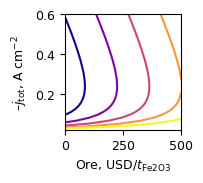

In [5]:
# Set up a mesh grid for desired variables
Js = np.linspace(0.25,6,40) #Var1
Ores = np.linspace(0,500,30) #Var2
XX,YY = np.meshgrid(Js,Ores) # syntax is columns, rows
rs, cs = np.shape(XX)
Z = np.zeros((rs,cs))

for row in range(0,len(Ores)): #Var2
    for col in range(0,len(Js)): #Var1
            J_val = XX[row,col]
            Ore_val = YY[row,col]
            
            cost = F.LCOFe(CellCurrent=J_val, iron_ore_price=Ore_val, PolCurve=True, ASR=5)
            
            Z[row,col] = cost
            
# Create the figure and axes
fig, ax = plt.subplots(1,1,figsize=(1.5,1.5))
plt.rcParams.update({'font.size': 9}) 

# Define the mapped isolines for Fe
CS = ax.contour(YY, XX/10, Z, [600, 800, 1000, 1200, 1400], cmap='plasma')

# Figure Labels
ax.set_xticks([0,250,500])
ax.set_xlabel('Ore, USD/$t_{\mathrm{Fe2O3}}$') #Var2
ax.set_ylabel('$–j_{\mathrm{tot}}$, A cm$^{-2}$') #Var1

### Figure 4g

This figure compares the relative influence of electricity prices and operating current density on the levelized cost of Fe

Text(0, 0.5, '$–j_{\\mathrm{tot}}$, A cm$^{-2}$')

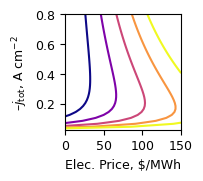

In [6]:
# Set up a mesh grid for desired variables
Js = np.linspace(0.25,8,40) #Var1
EPs = np.linspace(0,150,30) #Var2
XX,YY = np.meshgrid(Js,EPs) # syntax is columns, rows
rs, cs = np.shape(XX)
Z = np.zeros((rs,cs))

for row in range(0,len(EPs)): #Var2
    for col in range(0,len(Js)): #Var1
            J_val = XX[row,col]
            EP_val = YY[row,col]
            
            cost = F.LCOFe(CellCurrent=J_val, Electric_Price=EP_val, PolCurve=True, ASR=5)
            
            Z[row,col] = cost
            
# Create the figure and axes
fig, ax = plt.subplots(1,1,figsize=(1.5,1.5))
plt.rcParams.update({'font.size': 9}) 

# Define the mapped isolines for Fe
CS = ax.contour(YY, XX/10, Z, [400, 600, 800, 1000, 1200], cmap='plasma')

# Figure Labels
ax.set_xlabel('Elec. Price, $/MWh') #Var2
ax.set_ylabel('$–j_{\mathrm{tot}}$, A cm$^{-2}$') #Var1

### Supporting Figure

This figure compares the levelized cost of iron for various current densities and electricity prices assuming an Fe/O2 cell.

Text(0, 0.5, '$–j_{\\mathrm{tot}}$, A cm$^{-2}$')

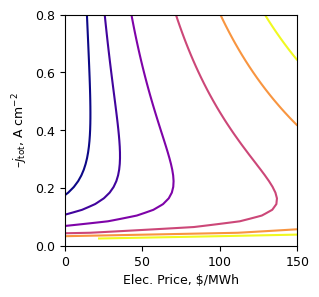

In [8]:
# Set up a mesh grid for desired variables
Js = np.linspace(0.25,8,40) #Var1
EPs = np.linspace(0,150,30) #Var2
XX,YY = np.meshgrid(Js,EPs) # syntax is columns, rows
rs, cs = np.shape(XX)
Z = np.zeros((rs,cs))

for row in range(0,len(EPs)): #Var2
    for col in range(0,len(Js)): #Var1
            J_val = XX[row,col]
            EP_val = YY[row,col]
            
            cost = F.LCOFe(CellCurrent=J_val, Electric_Price=EP_val, PolCurve=True, ASR=5,
                         alkaline_cell=True,chloriron_cell=False,Cell_Voltage=1.8)
            
            Z[row,col] = cost
            
# Create the figure and axes
fig, ax = plt.subplots(1,1,figsize=(3,3))
plt.rcParams.update({'font.size': 11}) 

CS = ax.contour(YY, XX/10, Z, [500, 600, 750, 1000, 1250, 1500], cmap='plasma')
#ax.clabel(CS, inline=True, fontsize=9, colors='k', fmt='$%1.0f')
ax.set_ylim([0,0.8])
#ax.set_xticks([0,250,500])

ax.set_xlabel('Elec. Price, $/MWh') #Var2
ax.set_ylabel('$–j_{\mathrm{tot}}$, A cm$^{-2}$') #Var1

### Supporting Figure

This figure compares the levelized cost of iron for various current densities and ore prices assuming an Fe/O2 cell

Text(0, 0.5, '$–j_{\\mathrm{tot}}$, A cm$^{-2}$')

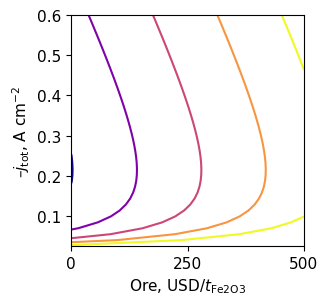

In [9]:
# Set up a mesh grid for desired variables
Js = np.linspace(0.25,6,40) #Var1
Ores = np.linspace(0,500,30) #Var2
XX,YY = np.meshgrid(Js,Ores) # syntax is columns, rows
rs, cs = np.shape(XX)
Z = np.zeros((rs,cs))

for row in range(0,len(Ores)): #Var2
    for col in range(0,len(Js)): #Var1
            J_val = XX[row,col]
            Ore_val = YY[row,col]
            
            cost = F.LCOFe(CellCurrent=J_val, iron_ore_price=Ore_val, PolCurve=True, ASR=5,
                         alkaline_cell=True,chloriron_cell=False,Cell_Voltage=1.8)
            
            Z[row,col] = cost
            
# Create the figure and axes
fig, ax = plt.subplots(1,1,figsize=(3,3))
plt.rcParams.update({'font.size': 11}) 

# Define the mapped isolines for Fe
CS = ax.contour(YY, XX/10, Z, [600, 800, 1000, 1200, 1400], cmap='plasma')

# Format plot
ax.set_xticks([0,250,500])
ax.set_xlabel('Ore, USD/$t_{\mathrm{Fe2O3}}$') #Var2
ax.set_ylabel('$–j_{\mathrm{tot}}$, A cm$^{-2}$') #Var1

### Supporting Figure

This figure compares the outcome for the levelized cost of iron for various current densities and electricity prices, while modifying the assumed value for the area-specific cell resistance.

1st Done
2nd Done
3rd Done


Text(0.5, 0, 'Elec. Price $/MWh')

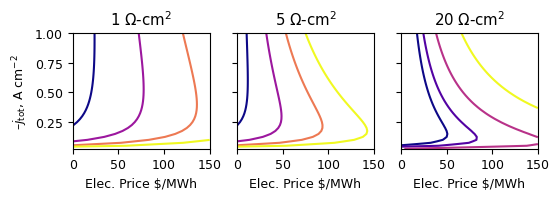

In [11]:
# Set up a mesh grid for desired variables
Js = np.linspace(0.25,10,40) #Var1
EPs = np.linspace(0,150,20) #Var2
XX,YY = np.meshgrid(Js,EPs) # syntax is columns, rows
rs, cs = np.shape(XX)

Z1 = np.zeros((rs,cs))
Z2 = np.zeros((rs,cs))
Z3 = np.zeros((rs,cs))
    
# Create the figure and axes
# For viewing, recommend 12 * 3
# For publication reccommend 6 * 1.5

fig, ax = plt.subplots(1,3,figsize=(6,1.5))
plt.rcParams.update({'font.size': 9}) 

# Low Specific Resistance
for row in range(0,len(EPs)): #Var2
    for col in range(0,len(Js)): #Var1
            J_val = XX[row,col]
            EP_val = YY[row,col]
            
            cost = F.LCOFe(CellCurrent=J_val, Electric_Price=EP_val, PolCurve=True, ASR=1)
            
            Z1[row,col] = cost

print("1st Done")
            
# Base Specfic Resistance 
for row in range(0,len(EPs)): #Var2
    for col in range(0,len(Js)): #Var1
            J_val = XX[row,col]
            EP_val = YY[row,col]
            
            cost = F.LCOFe(CellCurrent=J_val, Electric_Price=EP_val, PolCurve=True, ASR=5)
            
            Z2[row,col] = cost

print("2nd Done")
         
# High Specific Resistance 
for row in range(0,len(EPs)): #Var2
    for col in range(0,len(Js)): #Var1
            J_val = XX[row,col]
            EP_val = YY[row,col]
            
            cost = F.LCOFe(CellCurrent=J_val, Electric_Price=EP_val, PolCurve=True, ASR=20)
            
            Z3[row,col] = cost

            
print("3rd Done")

# Define the mapped isolines for Fe
CS1 = ax[0].contour(YY, XX/10, Z1, [250, 500, 750, 1000], cmap='plasma')
CS2 = ax[1].contour(YY, XX/10, Z2, [250, 500, 750, 1000], cmap='plasma')
CS3 = ax[2].contour(YY, XX/10, Z3, [750, 1000, 1500, 2500], cmap='plasma')


# Add plot labels and formatting
ax[0].set_title('1 $\Omega$-cm$^2$')
ax[1].set_title('5 $\Omega$-cm$^2$')
ax[2].set_title('20 $\Omega$-cm$^2$')

ax[1].set_yticklabels([])
ax[2].set_yticklabels([])

ax[0].set_ylabel('$–j_{\mathrm{tot}}$, A cm$^{-2}$') #Var1

ax[0].set_xlabel('Elec. Price $/MWh') #Var2
ax[1].set_xlabel('Elec. Price $/MWh') 
ax[2].set_xlabel('Elec. Price $/MWh') 


## Figure 2
This fiugre presents the Faradaic efficiency as a function of $j_{tot}$ (2a) as well as $E_{IR}$ vs $j_{Fe}$ (2b) for all three ore types.

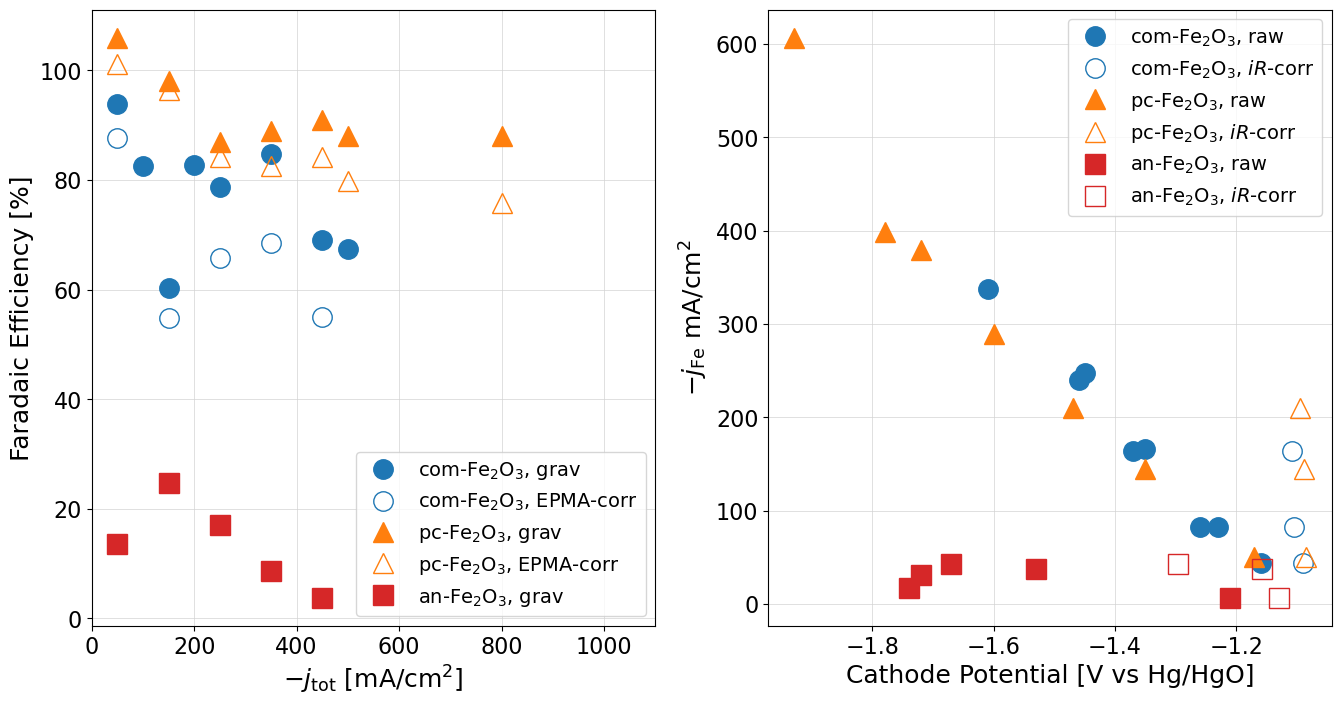

In [3]:
##### Data from as-grown sol-gel 
asGrown_js = [50, 150, 250, 350, 450, 500, 800]  # mA/cm2
asGrown_FE = [1.06, 0.98, 0.87, 0.89, 0.91, 0.88, 0.88] # %
asGrown_EPMA = [0.955, 0.983, 0.967, 0.927, 0.926, 0.906, 0.862] # % Fe
asGrown_Ecat = [-1.17, -1.35, -1.47, -1.6, -1.72, -1.78, -1.93] # V vs Hg/HgO
asGrown_Ru = [0.85, 0.87, 0.75, 0, 0, 0, 0]  # ohms


df_asGrown = pd.DataFrame({
    'j': asGrown_js,
    'FE': asGrown_FE,
    'EPMA' : asGrown_EPMA,
    'Ecat' : asGrown_Ecat,
    'Ru' : asGrown_Ru
})

## adjust FE for EPMA
df_asGrown['FE_EPMA'] = df_asGrown['FE'] * df_asGrown['EPMA']

## calculate partial iron current
df_asGrown['j_Fe'] = df_asGrown['j'] * df_asGrown['FE_EPMA']

## iR-Correct for E_cat
df_asGrown['E-iR'] = df_asGrown['Ecat'] + 2*df_asGrown['j']/1000*df_asGrown['Ru']



##### Data from annealed sol-gel 
annealed_js = [50, 150, 250, 350, 450]  # mA/cm2
annealed_FE = [0.135, 0.247, 0.17, 0.087, 0.038] # %
annealed_EPMA = [1, 1, 1, 1, 1] # % Fe
annealed_Ecat = [-1.21, -1.53, -1.67, -1.72, -1.74] # V vs Hg/HgO
annealed_Ru = [0.805, 1.24, 0.749, 0, 0]  # ohms


df_annealed = pd.DataFrame({
    'j': annealed_js,
    'FE': annealed_FE,
    'EPMA' : annealed_EPMA,
    'Ecat' : annealed_Ecat,
    'Ru' : annealed_Ru
})


## adjust FE for EPMA
df_annealed['FE_EPMA'] = df_annealed['FE'] * df_annealed['EPMA']

## calculate partial iron current
df_annealed['j_Fe'] = df_annealed['j'] * df_annealed['FE_EPMA']

## iR-Correct for E_cat
df_annealed['E-iR'] = df_annealed['Ecat'] + 2*df_annealed['j']/1000*df_annealed['Ru']



###### Data from commercial

## input the data
commercial_js = [50, 100, 150, 200, 250, 350, 450, 500]  # mA/cm2
commercial_FE = [0.939, 0.826, 0.603, 0.828, 0.788, 0.847, 0.691, 0.674] # %
commercial_EPMA = [0.933, 1, 0.91, 1, 0.834, 0.808, 0.796, 1] # % Fe
commercial_EPMA_interpolated = [0.933, 0.922, 0.91, 0.875, 0.834, 0.808, 0.796, 0.762]
commercial_Ecat = [-1.16, -1.23, -1.26, -1.35, -1.37, -1.46, -1.45, -1.61] # V vs Hg/HgO
commercial_Ru = [0.708, 0.685, 0.518, 0.632, 0.525, 0, 0, 0]  # ohms

## make the dataframe
df_commercial = pd.DataFrame({
    'j': commercial_js,
    'FE': commercial_FE,
    'EPMA' : commercial_EPMA,
    'Ecat' : commercial_Ecat,
    'Ru' : commercial_Ru
})

## adjust FE for EPMA
df_commercial['FE_EPMA'] = df_commercial['FE'] * df_commercial['EPMA']

## calculate partial iron current
df_commercial['j_Fe'] = df_commercial['j'] * df_commercial['FE_EPMA']

## iR-Correct for E_cat
df_commercial['E-iR'] = df_commercial['Ecat'] + 2*df_commercial['j']/1000*df_commercial['Ru']



##### generate the figure
fig, (axa, axb) = plt.subplots(1,2, figsize=(16,8))

### set marker size
marker_size = 14
## plot raw FE data in panel a
comRaw, = axa.plot(df_commercial['j'], df_commercial['FE']*100, label='com-${\mathrm{Fe_2O_3}}$, grav', marker='o', markersize=marker_size, c='C0', linestyle='none')
asGrownRaw, = axa.plot(df_asGrown['j'], df_asGrown['FE']*100, label='pc-${\mathrm{Fe_2O_3}}$, grav', marker='^', markersize=marker_size, c='C1', linestyle='none')
annRaw, = axa.plot(df_annealed['j'], df_annealed['FE']*100, label='an-${\mathrm{Fe_2O_3}}$, grav', marker='s', markersize=marker_size, c='C3', linestyle='none')


## plot EPMA-corrected FE data in panel b
### filter dataframes for EPMA > 0 
df_commFilt = df_commercial[df_commercial['EPMA']!=1]
df_asGrownFilt = df_asGrown[df_asGrown['EPMA']!=1]
df_annFilt = df_annealed[df_annealed['EPMA']!=1]
comEPMA, = axa.plot(df_commFilt['j'], df_commFilt['FE_EPMA']*100, label='com-${\mathrm{Fe_2O_3}}$, EPMA-corr', marker='o', markersize=marker_size, fillstyle='none', c='C0', linestyle='none')
asGrownEPMA, = axa.plot(df_asGrownFilt['j'], df_asGrownFilt['FE_EPMA']*100, label='pc-${\mathrm{Fe_2O_3}}$, EPMA-corr', markersize=marker_size, fillstyle='none', marker='^', c='C1', linestyle='none')
annEPMA, = axa.plot(df_annFilt['j'], df_annFilt['FE_EPMA']*100, label='an-${\mathrm{Fe_2O_3}}$, EPMA-corr', marker='s', markersize=marker_size, fillstyle='none', c='C3', linestyle='none')


## plot non-iR-corrected partial Iron Current data in panel b
df_commFilt = df_commercial[df_commercial['EPMA']!=1]
df_asGrownFilt = df_asGrown[df_asGrown['EPMA']!=1]
df_annFilt = df_annealed[df_annealed['EPMA']!=1]
comE, = axb.plot(df_commercial['Ecat'], df_commercial['j_Fe'], label='com-${\mathrm{Fe_2O_3}}$, raw', marker='o', markersize=marker_size, c='C0', linestyle='none')
asGrownE, = axb.plot(df_asGrown['Ecat'], df_asGrown['j_Fe'], label='pc-${\mathrm{Fe_2O_3}}$, raw', marker='^', markersize=marker_size, c='C1', linestyle='none')
annE, = axb.plot(df_annealed['Ecat'], df_annealed['j_Fe'], label='an-${\mathrm{Fe_2O_3}}$, raw', marker='s', markersize=marker_size, c='C3', linestyle='none')


## plot non-iR-corrected partial Iron Current data in panel b
### filter dataframes for j <= 250 mA/cm2
df_commFilt = df_commercial[df_commercial['j']<=250]
df_commFilt = df_commFilt[df_commFilt['EPMA']!=1]
df_asGrownFilt = df_asGrown[df_asGrown['j']<=250]
df_annFilt = df_annealed[df_annealed['j']<=250]
comiR, = axb.plot(df_commFilt['E-iR'], df_commFilt['j_Fe'], label='com-${\mathrm{Fe_2O_3}}$, $iR$-corr', marker='o', c='C0', fillstyle='none', markersize=marker_size, linestyle='none')
asGrowniR, = axb.plot(df_asGrownFilt['E-iR'], df_asGrownFilt['j_Fe'], label='pc-${\mathrm{Fe_2O_3}}$, $iR$-corr', marker='^', fillstyle='none', markersize=marker_size, c='C1', linestyle='none')
anniR, = axb.plot(df_annFilt['E-iR'], df_annFilt['j_Fe'], label='an-${\mathrm{Fe_2O_3}}$, $iR$-corr', marker='s', c='C3', fillstyle='none', markersize=marker_size, linestyle='none')

#axa.set_title('Faradaic Efficiency (Gravimetric)', size=18)
axa.set_xlabel(r'$-j_{\mathrm{tot}}$ ${\mathrm{[mA/cm^2]}}$', size=18)
axa.set_ylabel('Faradaic Efficiency [%]', size=18)
axa.set_xlim(0,1100)
axa.legend(handles=[comRaw, comEPMA, asGrownRaw, asGrownEPMA, annRaw], fontsize=14, loc='lower right', bbox_to_anchor=(1.0, 0.00))
axa.tick_params(axis='both', which='major', labelsize=16)
axa.grid(color='lightgrey', linestyle='-', linewidth=0.5)

#axc.set_title('Polarization Curve (non-iR-Corrected)', size=18)
axb.set_xlabel('Cathode Potential [V vs Hg/HgO]', size=18)
axb.set_ylabel(r'$-j_{\mathrm{Fe}}$ ${\mathrm{mA/cm^2}}$', size=18)

axb.legend(handles=[comE, comiR, asGrownE, asGrowniR, annE, anniR],fontsize=14)
axb.tick_params(axis='both', which='major', labelsize=16)
axb.grid(color='lightgrey', linestyle='-', linewidth=0.5)


#fig.savefig('Limiting Current 2-Panel Figure v7.png', bbox_inches='tight', dpi=500)




